# Import & Data load

In [134]:
import os
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
warnings.filterwarnings(action = 'ignore')
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)

In [7]:
ls ./data

Pre_Season_Batter.csv      Regular_Season_Batter.csv


In [4]:
data_path = os.path.join(os.getcwd(), 'data')
path = os.path.join(data_path, 'Regular_Season_Batter.csv')

In [107]:
batter_df = pd.read_csv(path)
batter_df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


# columns

```
'batter_id': 타자의 고유 아이디
'batter_name': 타자 이름
'year': 년도
'team': 소속팀
'avg'(BA): 타율 = H / AB = (안타 갯수 / 타수) *
'G': 출전 게임 수
'AB': 타수 (타석 - 볼넷 - 사구 - 희생번트 - 희생플라이)
'R': 득점
'H': 안타 (1루타 + 2루타 + 3루타 + 홈런)
'2B': 2루타
'3B': 3루타
'HR': 홈런
'TB': 루타 수
'RBI': 타점
'SB': 도루 성공
'CS': 도루 실패
'BB': 볼넷
'HBP': 사구 (몸에 맞는 볼)
'SO': 삼진아웃
'GDP': 병살타
'SLG': 장타율 = ((H-2B-3B-HR)x1 + 2Bx2 + 3Bx3 + HRx4) / AB = (1루타 X 1 + 2루타 X 2 + 3루타 X 3 + 홈런 X 4) / 타수 *
'OBP': 출루율 = (안타 + 볼넷 + 사구) / (타수 + 볼넷 + 사구 + *희생플라이) *
'E': 에러
'height/weight': 선수의 키 / 몸무게
'year_born': 선수의 생년월일
'position': 선수의 수비위치
'career': 선수의 커리어
'starting_salary': 선수의 한국 프로야구 입단 연봉
'OPS': OPS (OBP + SLG)
```

['타격지표'](https://m.blog.naver.com/PostView.nhn?isHttpsRedirect=true&blogId=anytax119&logNo=221392118713)

```
타수 vs 타석
- 타수 : 타격을 해서 결과가 나온 상황 => 볼넷은 타수로 기록되지 않는다 / 희생번트, 희생플라이는 타수로 적용이 안됩니다 / 
- 타석 : 배팅박스에 들어간 상황 (타격하러 들어감)

타점 = 타자가 쳐서 다른 주자들이 홈인해서 먹은 점수
득점 = 주자로서 홈인해서 먹은 점수

전통적 타자 평가 지표: 타율(avg), 타점(RBI), 장타율(SLG)
```

## 2009 - 2018 10년치 데이터

전체 2454 rows -> 1823

In [108]:
batter_df = batter_df[batter_df['year'] >= 2009]

In [109]:
batter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1823 entries, 0 to 2453
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        1823 non-null   int64  
 1   batter_name      1823 non-null   object 
 2   year             1823 non-null   int64  
 3   team             1823 non-null   object 
 4   avg              1810 non-null   float64
 5   G                1823 non-null   int64  
 6   AB               1823 non-null   int64  
 7   R                1823 non-null   int64  
 8   H                1823 non-null   int64  
 9   2B               1823 non-null   int64  
 10  3B               1823 non-null   int64  
 11  HR               1823 non-null   int64  
 12  TB               1823 non-null   int64  
 13  RBI              1823 non-null   int64  
 14  SB               1823 non-null   int64  
 15  CS               1823 non-null   int64  
 16  BB               1823 non-null   int64  
 17  HBP              18

In [110]:
# avg 13
# SLG 13
# OBP 11
# height/weight 459
# position 459
# starting_salary 693
# OPS 13

batter_df.isna().sum()

batter_id            0
batter_name          0
year                 0
team                 0
avg                 13
G                    0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
TB                   0
RBI                  0
SB                   0
CS                   0
BB                   0
HBP                  0
SO                   0
GDP                  0
SLG                 13
OBP                 11
E                    0
height/weight      459
year_born            0
position           459
career               0
starting_salary    693
OPS                 13
dtype: int64

```
avg(타율) NaN => H(안타): 0
SLG(장타율) NaN => H(안타): 0
OBP(출루율) NaN => H(안타), BB(볼넷), HBP(사구): 0
OPS NaN => SLG or OBP: NaN
```

In [111]:
batter_df[batter_df['avg'].isna()]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
18,138,백승룡,2013,한화,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN
663,97,마낙길,2015,NC,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,0,NaN,1989년 06월 22일,NaN,현산초(일산리틀)-언북중-충암고-경희대,NaN,NaN
931,132,박해민,2013,삼성,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/75kg,1990년 02월 24일,외야수(우투좌타),영중초-양천중-신일고-한양대,NaN,NaN
1210,175,양종민,2013,롯데,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,181cm/81kg,1990년 10월 09일,내야수(우투우타),사당초-강남중-덕수고-(영남사이버대)-롯데,9000만원,NaN
1661,231,이준수,2014,한화,NaN,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,1.0,0,176cm/80kg,1988년 06월 17일,포수(우투우타),백운초-신일중-신일고-한화,NaN,NaN
2023,281,정형식,2009,삼성,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,1991년 01월 28일,NaN,화정초-진흥중-진흥고-삼성,NaN,NaN
2138,295,지성준,2016,한화,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/92kg,1994년 04월 10일,포수(우투우타),청주우암초-청주중-청주고,NaN,NaN
2215,305,최민구,2015,삼성,NaN,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,0,NaN,1992년 03월 17일,NaN,칠성초-대구중-대구상원고-영남대,NaN,NaN
2233,309,최원제,2009,삼성,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,183cm/95kg,1989년 02월 04일,내야수(우투좌타),사당초-이수중-장충고-삼성-경찰,25000만원,NaN
2245,311,최윤석,2018,한화,NaN,2,0,1,0,0,0,0,0,0,0,0,2,0,0,0,NaN,1.0,0,175cm/75kg,1987년 03월 28일,내야수(우투우타),화곡초-덕수중-성남고-홍익대-SK-한화-경찰,6000만원,NaN


In [112]:
# 각 연도 프로리그에 등록된 타자의 수
batter_df.groupby('year')['batter_id'].count()

year
2009    124
2010    130
2011    151
2012    174
2013    194
2014    186
2015    207
2016    213
2017    217
2018    227
Name: batter_id, dtype: int64

# NaN 처리

In [116]:
batter_df[batter_df['OBP'].isna()]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
18,138,백승룡,2013,한화,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN
663,97,마낙길,2015,NC,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,0,NaN,1989년 06월 22일,NaN,현산초(일산리틀)-언북중-충암고-경희대,NaN,NaN
931,132,박해민,2013,삼성,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/75kg,1990년 02월 24일,외야수(우투좌타),영중초-양천중-신일고-한양대,NaN,NaN
1210,175,양종민,2013,롯데,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,181cm/81kg,1990년 10월 09일,내야수(우투우타),사당초-강남중-덕수고-(영남사이버대)-롯데,9000만원,NaN
2023,281,정형식,2009,삼성,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,1991년 01월 28일,NaN,화정초-진흥중-진흥고-삼성,NaN,NaN
2138,295,지성준,2016,한화,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/92kg,1994년 04월 10일,포수(우투우타),청주우암초-청주중-청주고,NaN,NaN
2215,305,최민구,2015,삼성,NaN,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,0,NaN,1992년 03월 17일,NaN,칠성초-대구중-대구상원고-영남대,NaN,NaN
2233,309,최원제,2009,삼성,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,183cm/95kg,1989년 02월 04일,내야수(우투좌타),사당초-이수중-장충고-삼성-경찰,25000만원,NaN
2345,325,하준호,2009,롯데,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,174cm/78kg,1989년 04월 29일,외야수(좌투좌타),하단초-대동중-경남고-롯데,16000만원,NaN
2416,337,홍재호,2017,KIA,NaN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/79kg,1987년 05월 10일,내야수(우투우타),부산대연초-대천중-부산고-고려대-KIA-경찰,4000만원,NaN


In [117]:
def nan_process(df, column):

    # 'avg'(BA): 타율 = H / AB = (안타 갯수 / 타수)
    if column == 'avg':
        # 'AB': 타수 (타석 - 볼넷 - 사구 - 희생번트 - 희생플라이)
        df.loc[df['AB'] != 0, column] = round(df['H'] / df['AB'], 3)
        df.loc[df['AB'] == 0, column] = float(0)
        return df

    # 'SLG': 장타율 = (TB / AB = (1루타 X 1 + 2루타 X 2 + 3루타 X 3 + 홈런 X 4)루타수 / 타수
    elif column == 'SLG':
        df.loc[df['AB'] != 0, column] = round(df['TB'] / df['AB'], 3)
        df.loc[df['AB'] == 0, column] = float(0)
        return df

    # 'OBP': 출루율 = (안타 + 볼넷 + 사구) / (타수 + 볼넷 + 사구 + *희생플라이)
    # 현재 데이터에서 OBP가 NaN인 데이터는 AB, BB, HBP가 0이고, 희생플라이를 단독으로 구할 수 없다.
    # 분자가 0일 경우, 0으로 처리한다. => 타석에서 희생플라이만 한 경우에 대한 데이터를 처리하지 못함 => 전부 NaN으로?
    elif column == 'OBP':
        df.loc[df['H'] + df['BB'] + df['HBP'] == 0, 'OBP'] = float(0)
        return df

    # 'OPS': OPS (OBP + SLG)
    elif column == 'OPS':
        df.loc[df['OBP'].isin([0, np.nan]), 'OPS'] = float(0)
        df.loc[~df['OBP'].isin([0, np.nan]), 'OPS'] = df['SLG'] + df['OBP']
        return df

In [118]:
batter_df[batter_df['avg'].isna()] = nan_process(batter_df[batter_df['avg'].isna()], 'avg')
batter_df[batter_df['SLG'].isna()] = nan_process(batter_df[batter_df['SLG'].isna()], 'SLG')
batter_df[batter_df['OBP'].isna()] = nan_process(batter_df[batter_df['OBP'].isna()], 'OBP')
batter_df[batter_df['OPS'].isna()] = nan_process(batter_df[batter_df['OPS'].isna()], 'OPS')

batter_df.isna().sum()

batter_id            0
batter_name          0
year                 0
team                 0
avg                  0
G                    0
AB                   0
R                    0
H                    0
2B                   0
3B                   0
HR                   0
TB                   0
RBI                  0
SB                   0
CS                   0
BB                   0
HBP                  0
SO                   0
GDP                  0
SLG                  0
OBP                  0
E                    0
height/weight      459
year_born            0
position           459
career               0
starting_salary    693
OPS                  0
dtype: int64

In [9]:
# def nan_process(df, column):

#     # 'avg'(BA): 타율 = H / AB = (안타 갯수 / 타수)
#     if column == 'avg':
#         # 'AB': 타수 (타석 - 볼넷 - 사구 - 희생번트 - 희생플라이)
#         if df['AB'] != 0:
#             return round(df['H'] / df['AB'], 3)
#         else:
#             return float(0)

#     # 'SLG': 장타율 = (TB / AB = (1루타 X 1 + 2루타 X 2 + 3루타 X 3 + 홈런 X 4)루타수 / 타수
#     elif column == 'SLG':
#         if df['AB'] != 0:
#             # 'H': 안타 (1루타 + 2루타 + 3루타 + 홈런)
#             return round(df['TB'] / df['AB'], 3)
#         else:
#             return float(0)  

#     # 'OBP': 출루율 = (안타 + 볼넷 + 사구) / (타수 + 볼넷 + 사구 + *희생플라이)
#     # 현재 데이터에서 OBP가 NaN인 데이터는 AB, BB, HBP가 0이고, 희생플라이를 단독으로 구할 수 없다.
#     # 분모가 0일 경우, 0으로 처리한다. => 타석에서 희생플라이만 한 경우에 대한 데이터를 처리하지 못함 => 전부 NaN으로?
#     elif column == 'OBP':
#         if df['H'] == 0 and df['BB'] == 0 and df['HBP'] == 0: # BB: 볼넷, HBP: 사구
#             return float(0)
#         else:
#             np.nan

#     # 'OPS': OPS (OBP + SLG)
#     elif column == 'OPS':
#         if df['OBP'].isin([0, np.nan]):
#             return float(0)
#         else:
#             return round(df['SLG'] / df['OBP'], 3)

타수가 0인 애들 (볼넷, 사구, 희생번트, 희생플라이 제외 타격을 마무리하지 못함) => 볼넷 or 사구 or 희생번트 or 희생 플라이

경기수 - 타수 = 사구 + 볼넷 + 희생번트 + 희생플라이

In [125]:
batter_df[~np.isclose(batter_df['H'] / batter_df['AB'], batter_df['avg'], atol=0.001)]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
18,138,백승룡,2013,한화,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,NaN
663,97,마낙길,2015,NC,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,0,NaN,1989년 06월 22일,NaN,현산초(일산리틀)-언북중-충암고-경희대,NaN,NaN
931,132,박해민,2013,삼성,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/75kg,1990년 02월 24일,외야수(우투좌타),영중초-양천중-신일고-한양대,NaN,NaN
1210,175,양종민,2013,롯데,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,181cm/81kg,1990년 10월 09일,내야수(우투우타),사당초-강남중-덕수고-(영남사이버대)-롯데,9000만원,NaN
1661,231,이준수,2014,한화,0.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,1.0,0,176cm/80kg,1988년 06월 17일,포수(우투우타),백운초-신일중-신일고-한화,NaN,NaN
2023,281,정형식,2009,삼성,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,1991년 01월 28일,NaN,화정초-진흥중-진흥고-삼성,NaN,NaN
2138,295,지성준,2016,한화,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,180cm/92kg,1994년 04월 10일,포수(우투우타),청주우암초-청주중-청주고,NaN,NaN
2215,305,최민구,2015,삼성,0.0,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,NaN,NaN,0,NaN,1992년 03월 17일,NaN,칠성초-대구중-대구상원고-영남대,NaN,NaN
2233,309,최원제,2009,삼성,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,183cm/95kg,1989년 02월 04일,내야수(우투좌타),사당초-이수중-장충고-삼성-경찰,25000만원,NaN
2245,311,최윤석,2018,한화,0.0,2,0,1,0,0,0,0,0,0,0,0,2,0,0,0,NaN,1.0,0,175cm/75kg,1987년 03월 28일,내야수(우투우타),화곡초-덕수중-성남고-홍익대-SK-한화-경찰,6000만원,NaN


In [31]:
batter_df['position'].isna().sum()

459

같은 선수의 position, height/weight가 NaN 이다. => 비주류 선수인가? => 놉! 경기 수 많고 꽤 유명한 선수들도 많음

In [39]:
sum(batter_df[batter_df['position'].isna()].index != batter_df[batter_df['height/weight'].isna()].index)

0

In [113]:
# 각 연도 position이 등록되지 않은 선수
batter_df[batter_df['position'].isna()].fillna(0).groupby('year')['batter_id'].count()

year
2009    48
2010    53
2011    61
2012    65
2013    67
2014    53
2015    53
2016    38
2017    21
Name: batter_id, dtype: int64

In [171]:
batter_df.loc[:, ['position','height/weight']].isna().sum() / batter_df.shape[0]

position         0.251783
height/weight    0.251783
dtype: float64

In [114]:
batter_df[~batter_df['position'].isna()].describe()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1364.000000,1364.000000,1355.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1355.000000,1357.000000,1364.000000,1355.000000
mean,173.618035,2014.510997,0.245165,76.629765,220.378299,33.912023,62.607038,11.048387,1.081378,6.237537,94.530792,31.469941,5.697214,2.443548,22.665689,3.816716,43.068182,4.997801,0.358162,0.313909,3.895894,0.671059
std,96.063007,2.762132,0.095124,45.967037,176.201422,30.401127,55.111368,10.442618,1.810130,8.528535,87.210230,31.610266,9.144072,3.232567,21.673248,4.448629,34.306168,4.879997,0.152683,0.109638,4.586114,0.248010
min,0.000000,2009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.750000,2012.000000,0.214000,30.000000,43.000000,6.000000,9.000000,1.000000,0.000000,0.000000,13.000000,3.000000,0.000000,0.000000,3.000000,0.000000,11.000000,1.000000,0.284500,0.282000,0.000000,0.574000
50%,175.500000,2015.000000,0.263000,87.000000,198.000000,28.000000,50.500000,9.000000,0.000000,2.000000,73.500000,22.000000,2.000000,1.000000,17.000000,2.000000,40.000000,4.000000,0.375000,0.335000,2.000000,0.713000
75%,256.000000,2017.000000,0.300000,118.000000,381.250000,57.000000,110.250000,19.000000,2.000000,9.000000,164.000000,52.000000,7.000000,4.000000,38.000000,6.000000,67.000000,8.000000,0.448500,0.372000,6.000000,0.815000
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,377.000000,146.000000,66.000000,21.000000,108.000000,27.000000,161.000000,24.000000,1.333000,1.000000,27.000000,2.000000


In [115]:
batter_df[batter_df['position'].isna()].describe()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,459.000000,459.000000,455.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,455.000000,455.000000,459.000000,455.000000
mean,184.644880,2012.605664,0.223026,59.379085,141.925926,19.888889,37.342048,6.618736,0.551198,3.642702,55.991285,19.102397,3.095861,1.586057,16.191721,2.217865,29.015251,3.479303,0.314606,0.301699,2.257081,0.616305
std,100.800758,2.301331,0.096899,40.487640,134.844383,23.034687,40.364586,7.970782,1.097384,6.851737,66.744248,24.575798,5.795982,2.338845,18.633862,2.799023,26.147085,4.217491,0.146190,0.105259,3.238572,0.239041
min,6.000000,2009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108.000000,2011.000000,0.188000,22.000000,31.000000,3.000000,6.000000,1.000000,0.000000,0.000000,8.000000,2.000000,0.000000,0.000000,2.000000,0.000000,8.000000,0.000000,0.250000,0.265986,0.000000,0.518056
50%,196.000000,2013.000000,0.238000,53.000000,93.000000,12.000000,21.000000,3.000000,0.000000,1.000000,31.000000,9.000000,1.000000,1.000000,10.000000,1.000000,22.000000,2.000000,0.322785,0.321429,1.000000,0.650295
75%,280.000000,2014.000000,0.274500,94.500000,224.500000,29.000000,59.000000,10.000000,1.000000,4.000000,80.500000,28.000000,3.000000,2.000000,25.000000,3.000000,44.000000,5.000000,0.400000,0.357493,3.000000,0.751779
max,343.000000,2017.000000,1.000000,142.000000,534.000000,130.000000,180.000000,42.000000,9.000000,48.000000,373.000000,140.000000,50.000000,14.000000,103.000000,17.000000,139.000000,22.000000,1.000000,1.000000,25.000000,2.000000


In [40]:
batter_df[batter_df['position'].isna()]

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
16,138,백승룡,2011,한화,0.176,38,51,7,9,2,0,0,11,3,1,1,7,2,13,1,0.215686,0.300000,0,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,0.515686
17,138,백승룡,2012,한화,0.231,33,52,3,12,1,0,0,13,3,3,0,6,3,20,0,0.250000,0.344262,1,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,0.594262
18,138,백승룡,2013,한화,0.000,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,NaN,1982년 08월 16일,NaN,사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센,NaN,0.000000
31,297,진갑용,2009,삼성,0.232,57,142,10,33,3,1,3,47,20,1,2,15,4,23,5,0.330986,0.322981,2,NaN,1974년 05월 08일,NaN,하단초-초량중-부산고-고려대-OB-두산-삼성,NaN,0.653967
32,297,진갑용,2010,삼성,0.263,100,259,36,68,8,0,10,106,28,0,0,45,2,57,7,0.409266,0.375817,4,NaN,1974년 05월 08일,NaN,하단초-초량중-부산고-고려대-OB-두산-삼성,NaN,0.785083
33,297,진갑용,2011,삼성,0.273,112,286,26,78,7,0,10,115,42,1,0,35,3,53,10,0.402098,0.358025,6,NaN,1974년 05월 08일,NaN,하단초-초량중-부산고-고려대-OB-두산-삼성,NaN,0.760123
34,297,진갑용,2012,삼성,0.307,114,313,27,96,15,1,6,131,57,0,0,17,7,46,6,0.418530,0.356083,3,NaN,1974년 05월 08일,NaN,하단초-초량중-부산고-고려대-OB-두산-삼성,NaN,0.774613
35,297,진갑용,2013,삼성,0.271,101,181,22,49,9,0,6,76,36,0,0,12,5,28,5,0.419890,0.333333,4,NaN,1974년 05월 08일,NaN,하단초-초량중-부산고-고려대-OB-두산-삼성,NaN,0.753223
36,297,진갑용,2014,삼성,0.412,11,17,2,7,0,0,0,7,4,0,0,0,0,1,0,0.411765,0.411765,1,NaN,1974년 05월 08일,NaN,하단초-초량중-부산고-고려대-OB-두산-삼성,NaN,0.823529
37,297,진갑용,2015,삼성,0.324,39,68,8,22,2,0,3,33,10,0,0,4,0,9,3,0.485294,0.361111,0,NaN,1974년 05월 08일,NaN,하단초-초량중-부산고-고려대-OB-두산-삼성,NaN,0.846405


포지션 별 OPS, avg, H, SLG, OBP, BB

# 상관관계

https://bskyvision.com/entry/%EC%84%B8%EC%9D%B4%EB%B2%84%EB%A9%94%ED%8A%B8%EB%A6%AD%EC%8A%A4-%ED%83%80%EC%9C%A8-%EC%B6%9C%EB%A3%A8%EC%9C%A8-OPS-RC-%EC%A4%91-%EB%AC%B4%EC%97%87%EC%9D%B4-%EA%B0%80%EC%9E%A5-%EB%93%9D%EC%A0%90%EB%A0%A5%EA%B3%BC-%EC%97%B0%EA%B4%80%EC%9E%88%EC%9D%84%EA%B9%8C

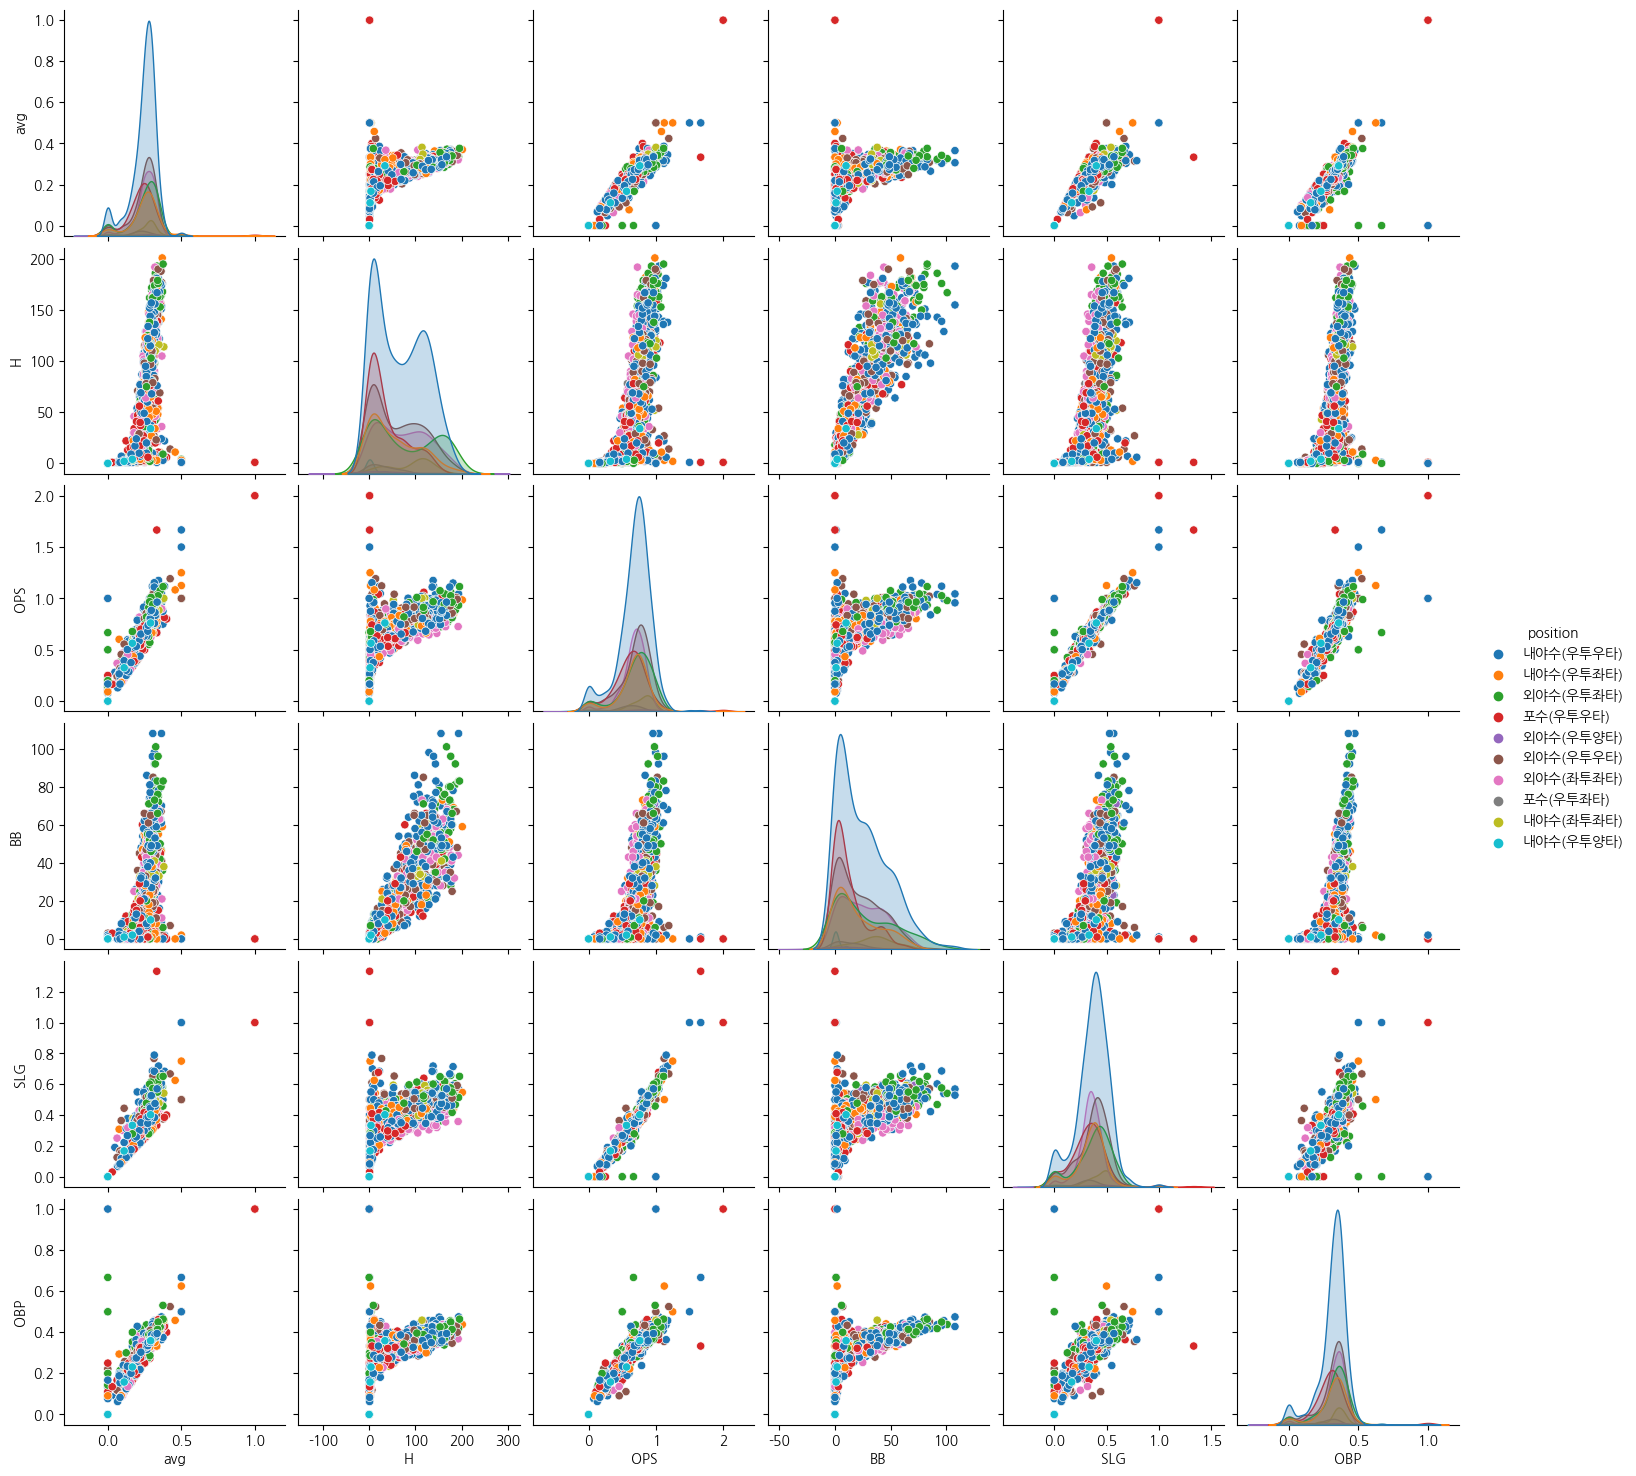

In [135]:
sns.pairplot(batter_df.loc[:, ['avg', 'H', 'OPS', 'BB', 'SLG', 'OBP', 'position']], hue = 'position')

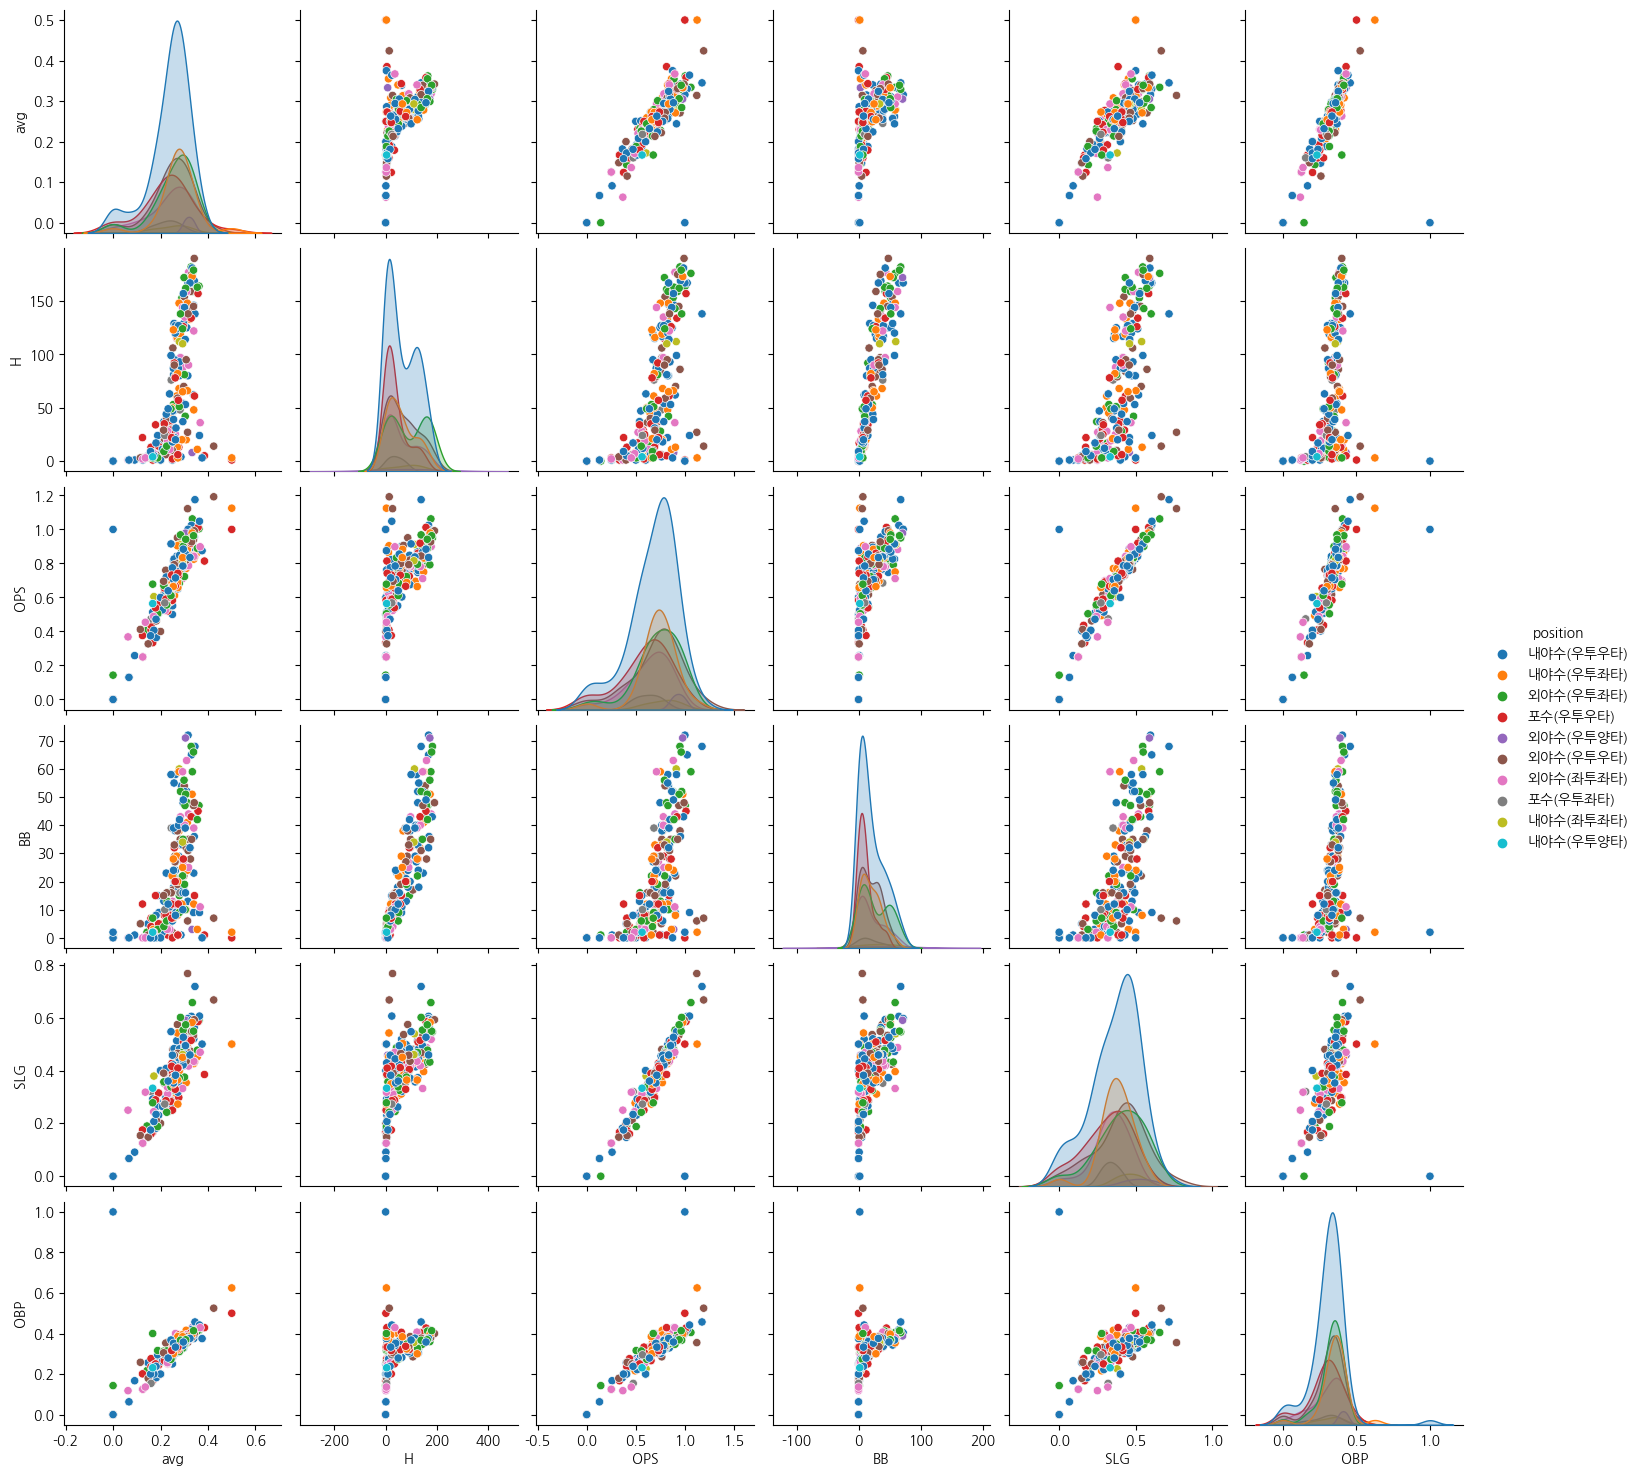

In [138]:
sns.pairplot(b_2018.loc[:, ['avg', 'H', 'OPS', 'BB', 'SLG', 'OBP', 'position']], hue = 'position')

In [157]:
corr = batter_df.loc[batter_df['batter_name'] == '김민성', ['avg', 'H', 'OPS', 'BB', 'SLG', 'OBP']].corr()
print(corr.shape)

(6, 6)


<Axes: >

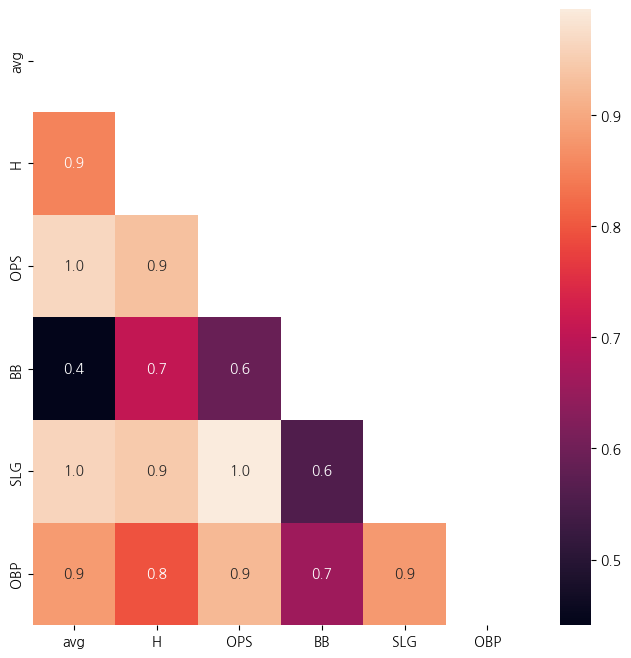

In [158]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize = (8, 8))
sns.heatmap(corr, fmt = '.1f', annot = True, mask = mask)

In [147]:
batter_df = batter_df.set_index('year').sort_index(ascending = False)

In [173]:
fig = px.scatter(batter_df.loc[batter_df['batter_name'] == '김민성', ['SLG', 'OBP']], x='SLG', y='OBP', labels = '타율')
fig.show()

In [176]:
temp = batter_df[batter_df['position'].notnull()]

In [181]:
import re
def position(x):
    if re.findall('내야수', x):
        return '내야수'
    elif re.findall('외야수', x):
        return '외야수'
    else:
        return '포수'

temp['pos'] = temp['position'].apply(lambda x: position(x))

In [186]:
fig = px.scatter(temp, x='SLG', y='OBP', color='pos')

fig.show()

In [185]:
fig = px.scatter(temp, x='SLG', y='OBP', color='team')
# fig = px.scatter(temp.loc[temp['position'].str.contains('외야수'), ['SLG', 'OBP']], x='SLG', y='OBP')
# fig = px.scatter(temp.loc[temp['position'].str.contains('포수'), ['SLG', 'OBP']], x='SLG', y='OBP')
fig.show()

In [51]:
b_2018 = batter_df[batter_df['year'] == 2018]

In [52]:
b_2018['position'].unique()

array(['내야수(우투우타)', '내야수(우투좌타)', '외야수(우투좌타)', '포수(우투우타)', '외야수(우투양타)',
       '외야수(우투우타)', '외야수(좌투좌타)', '포수(우투좌타)', '내야수(좌투좌타)', '내야수(우투양타)'],
      dtype=object)

In [166]:
import plotly.express as px

fig = px.scatter(b_2018, x='OPS', y='avg', labels = '타율')

# 차트 표시
fig.show()

# fig = plt.figure(figsize = (10, 10))
# fig.subplots()

In [170]:
fig = px.scatter(b_2018, x='OPS', y='H', labels = '안타')
fig.show()

In [168]:
fig = px.scatter(b_2018, x='OPS', y='BB', labels = '볼넷')
fig.show()

pd.Series에 map 사용

map 함수를 이용해 Series의 값을 map에 지정된 Dictionary의 key와 매칭하고 value 반환

In [ ]:
import pandas as pd

# 데이터프레임 생성
# 예시로는 일부 데이터를 사용했습니다.
data = {
    'PassengerId': [1, 2, 3, 4, 5],
    'Nationality': ['CelticEnglish', 'CelticEnglish', 'Nordic,Scandinavian,Sweden', 'CelticEnglish', 'CelticEnglish']
}
df = pd.DataFrame(data)

# Nationality 비율 계산
nationality_counts = df['Nationality'].value_counts()
total = nationality_counts.sum()
df['Nationality_Ratio'] = df['Nationality'].map(nationality_counts) / total

# 결과 출력
print(df)